In [823]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [824]:
data=pd.read_excel("/content/Data_Train.xlsx")

In [825]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#PREPROCESSING

In [826]:
data.drop("Additional_Info",axis=1,inplace=True)

In [827]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302


In [828]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Price              0
dtype: int64

#we have only two null rows so it's fine to drop that

In [829]:
data=data.dropna()

In [830]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

In [831]:
data['Dep_hour']=pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_min']=pd.to_datetime(data['Dep_Time']).dt.minute

In [832]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Dep_hour,Dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,16,50


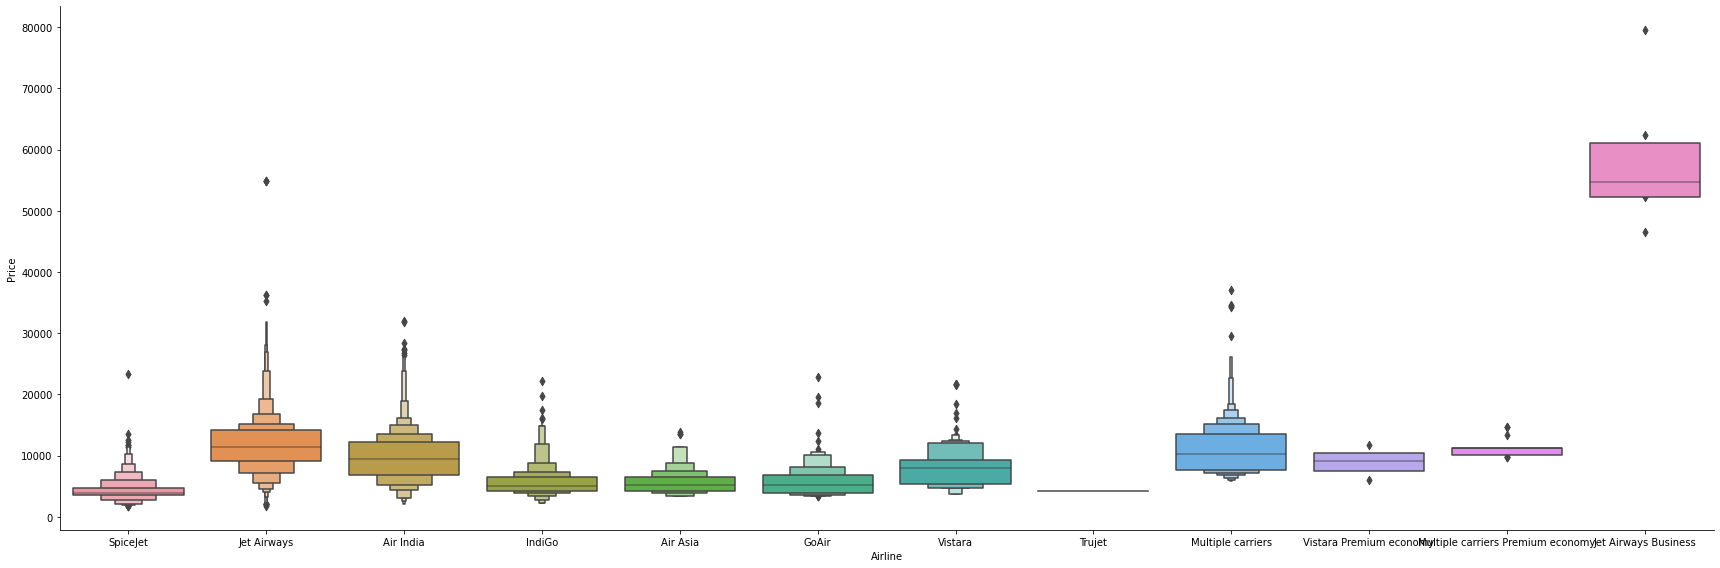

In [833]:
sns.catplot(y='Price',x='Airline',data=data.sort_values('Price'),height=8,kind="boxen",aspect = 3)

In [834]:
data['Arr_hour']=pd.to_datetime(data['Arrival_Time']).dt.hour

In [835]:
data['Arr_min']=pd.to_datetime(data['Arrival_Time']).dt.minute

In [836]:
data['journey_month']=pd.to_datetime(data['Date_of_Journey'],format="%d/%m/%Y").dt.month 


In [837]:
data['journey_day']=pd.to_datetime(data['Date_of_Journey'],format="%d/%m/%Y").dt.day

In [838]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Dep_hour,Dep_min,Arr_hour,Arr_min,journey_month,journey_day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,22,20,1,10,3,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,5,50,13,15,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,9,25,4,25,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,18,5,23,30,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,16,50,21,35,3,1


In [839]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

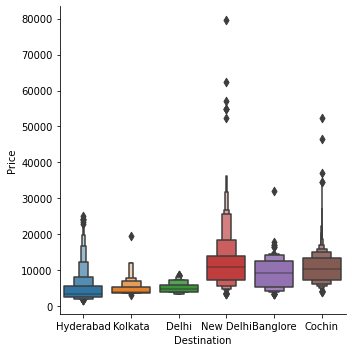

In [840]:
sns.catplot(x='Destination',y='Price',data=data.sort_values('Price'),height=5,kind="boxen")

In [841]:
data['Source']=encode.fit_transform(data['Source'])
data['Destination']=encode.fit_transform(data['Destination'])

In [842]:
# from sklearn.preprocessing import OneHotEncoder
# source=data[['Source']]
# source=pd.get_dummies(source,drop_first=True)
# source.head()

In [843]:
# desti=data[['Destination']]
# desti=pd.get_dummies(desti,drop_first=True)
# desti.head()

In [844]:
# from sklearn.preprocessing import OneHotEncoder
air=data['Airline']
air=pd.get_dummies(air,drop_first=True)
air.head()


,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


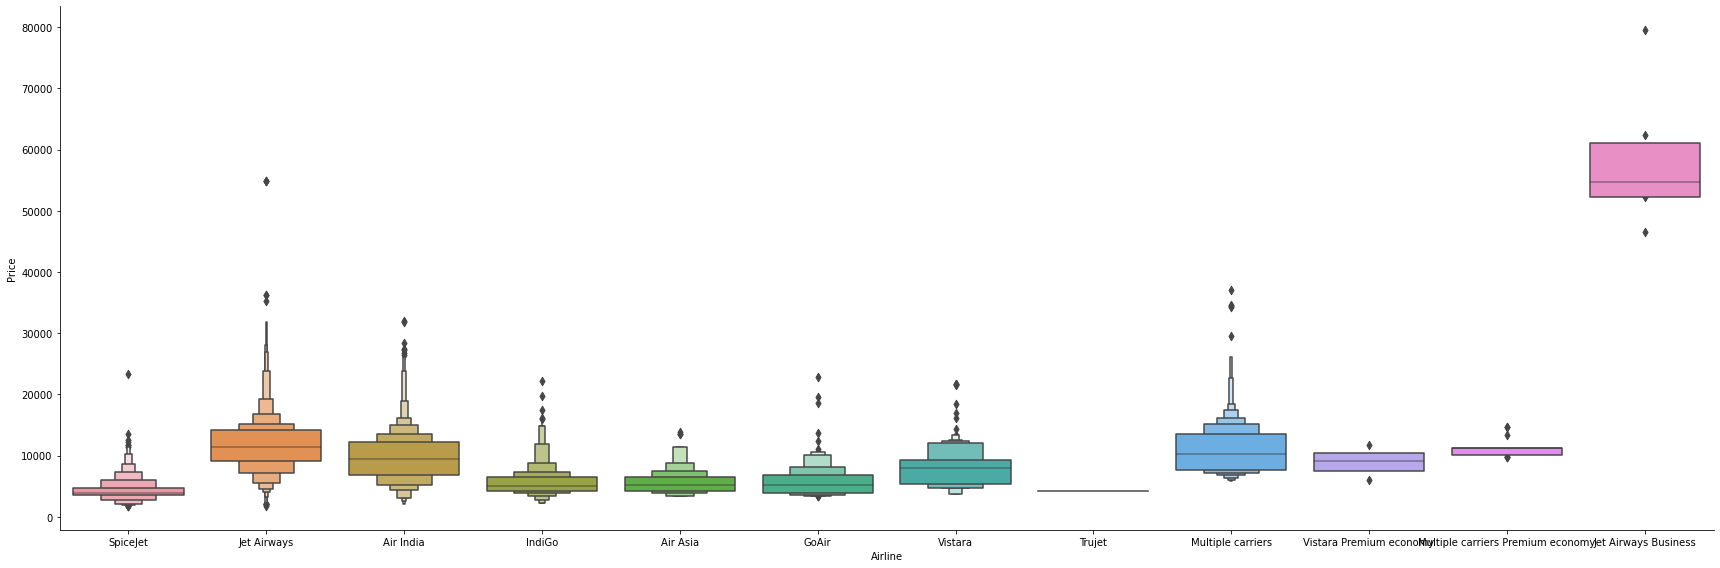

In [845]:
sns.catplot(y='Price',x='Airline',data=data.sort_values('Price'),height=8,kind="boxen",aspect = 3)

#here wE used laeblencoder for nominal data but in real time we are not allow to do that

make sure that our data contain minumum no of columns so that we can avoid overfitting

In [846]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Dep_hour,Dep_min,Arr_hour,Arr_min,journey_month,journey_day
0,IndiGo,24/03/2019,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,22,20,1,10,3,24
1,Air India,1/05/2019,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,5,50,13,15,5,1
2,Jet Airways,9/06/2019,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,9,25,4,25,6,9
3,IndiGo,12/05/2019,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,18,5,23,30,5,12
4,IndiGo,01/03/2019,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,16,50,21,35,3,1


In [847]:
data['Duration'][0].split("h")[0]

'2'

In [848]:
data=pd.DataFrame(data)

In [849]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Dep_hour,Dep_min,Arr_hour,Arr_min,journey_month,journey_day
0,IndiGo,24/03/2019,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,22,20,1,10,3,24
1,Air India,1/05/2019,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,5,50,13,15,5,1
2,Jet Airways,9/06/2019,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,9,25,4,25,6,9
3,IndiGo,12/05/2019,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,18,5,23,30,5,12
4,IndiGo,01/03/2019,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,16,50,21,35,3,1


In [850]:
# dur_hour=[]
# dur_min=[]
# for token in data['Duration']:
#   # print(token.split('h')[0])
#   dur_hour.append(token.split('h')[0])


In [851]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [852]:
data['Dur_hour']=duration_hours
data['Dur_min']=duration_mins

In [853]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Dep_hour,Dep_min,Arr_hour,Arr_min,journey_month,journey_day,Dur_hour,Dur_min
0,IndiGo,24/03/2019,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,22,20,1,10,3,24,2,50
1,Air India,1/05/2019,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,5,50,13,15,5,1,7,25
2,Jet Airways,9/06/2019,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,9,25,4,25,6,9,19,0
3,IndiGo,12/05/2019,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,18,5,23,30,5,12,5,25
4,IndiGo,01/03/2019,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,16,50,21,35,3,1,4,45


#make sure that u have only minimum no of columns so that we can avoid overfitting

In [854]:
data.drop(['Date_of_Journey','Route','Arrival_Time','Dep_Time','Arrival_Time','Duration','Airline'],axis=1,inplace=True)

In [855]:
data.head()

,Source,Destination,Total_Stops,Price,Dep_hour,Dep_min,Arr_hour,Arr_min,journey_month,journey_day,Dur_hour,Dur_min
0,0,5,non-stop,3897,22,20,1,10,3,24,2,50
1,3,0,2 stops,7662,5,50,13,15,5,1,7,25
2,2,1,2 stops,13882,9,25,4,25,6,9,19,0
3,3,0,1 stop,6218,18,5,23,30,5,12,5,25
4,0,5,1 stop,13302,16,50,21,35,3,1,4,45


In [856]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [857]:
data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [858]:
data.head()

,Source,Destination,Total_Stops,Price,Dep_hour,Dep_min,Arr_hour,Arr_min,journey_month,journey_day,Dur_hour,Dur_min
0,0,5,0,3897,22,20,1,10,3,24,2,50
1,3,0,2,7662,5,50,13,15,5,1,7,25
2,2,1,2,13882,9,25,4,25,6,9,19,0
3,3,0,1,6218,18,5,23,30,5,12,5,25
4,0,5,1,13302,16,50,21,35,3,1,4,45


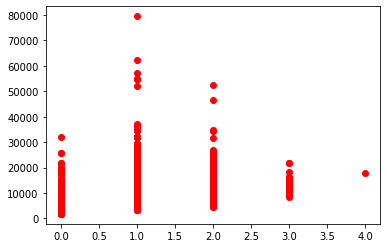

In [859]:
plt.scatter(data['Total_Stops'],data['Price'],color='red')

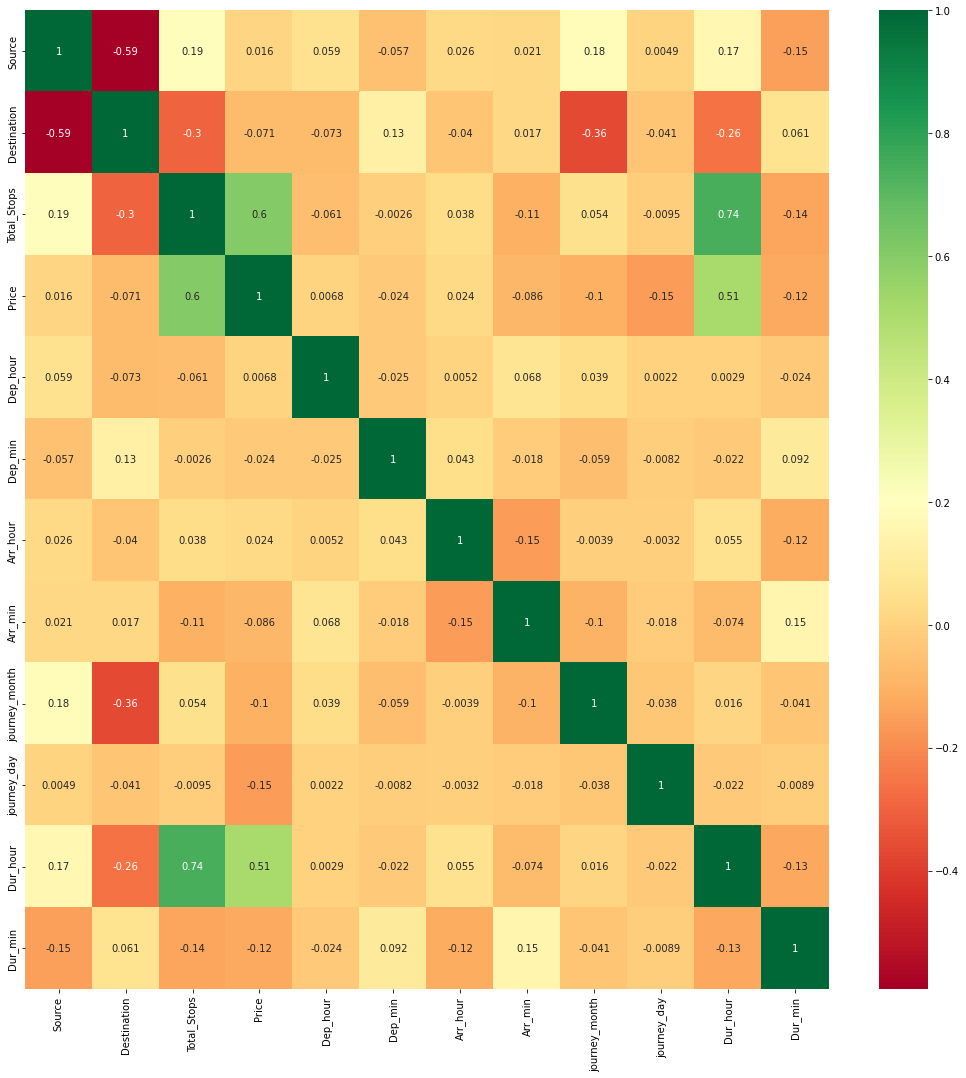

In [860]:
plt.figure(figsize = (18,18))
sns.heatmap(data.corr(),cmap="RdYlGn",annot=True)

In [861]:
data.drop('Dur_min',inplace=True,axis=1)

In [862]:
data.drop('Arr_min',inplace=True,axis=1)

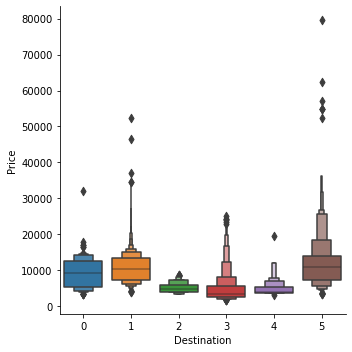

In [863]:
sns.catplot(x='Destination',y='Price',data=data.sort_values('Price'),height=5,kind="boxen")

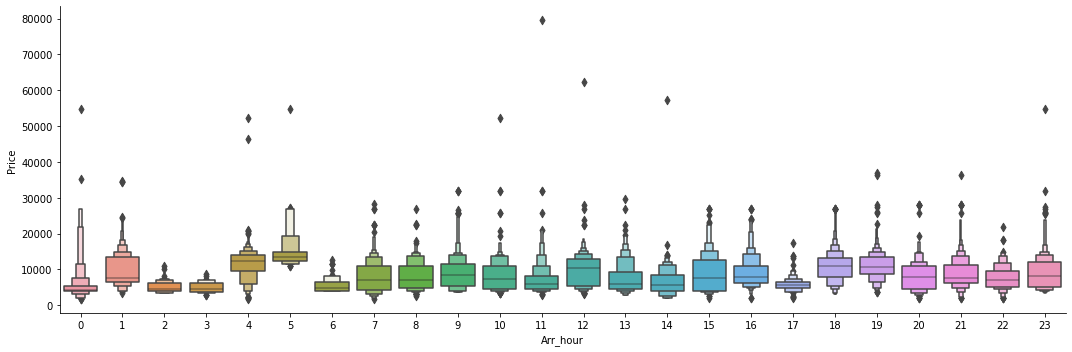

In [864]:
sns.catplot(y='Price',x='Arr_hour',data=data.sort_values('Price',ascending=True),kind='boxen',height=5,aspect = 3)

In [865]:
train_data=pd.concat([data,air,desti,source],axis=1)

In [866]:
train_data.head()

,Source,Destination,Total_Stops,Price,Dep_hour,Dep_min,Arr_hour,journey_month,journey_day,Dur_hour,...,Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,5,0,3897,22,20,1,3,24,2,...,0,0,0,0,0,1,0,0,0,0
1,3,0,2,7662,5,50,13,5,1,7,...,0,0,0,0,0,0,0,0,1,0
2,2,1,2,13882,9,25,4,6,9,19,...,0,1,0,0,0,0,0,1,0,0
3,3,0,1,6218,18,5,23,5,12,5,...,0,0,0,0,0,0,0,0,1,0
4,0,5,1,13302,16,50,21,3,1,4,...,0,0,0,0,0,1,0,0,0,0


In [867]:
train_data.shape

(10682, 30)

In [868]:
# train_data.drop(['Source','Destination'],axis=1,inplace=True)

In [869]:
train_data.columns

Index(['Source', 'Destination', 'Total_Stops', 'Price', 'Dep_hour', 'Dep_min',
       'Arr_hour', 'journey_month', 'journey_day', 'Dur_hour', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai'],
      dtype='object')

In [870]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()


In [871]:
# x=train_data.loc[:,['Total_Stops','Dep_hour', 'Dep_min', 'Arr_hour',
#        'journey_month', 'journey_day', 'Dur_hour', 'Air India', 'GoAir',
#        'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
#        'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
#        'Vistara Premium economy']]

In [872]:
x=train_data.loc[:,['Total_Stops','Dep_hour', 'Dep_min',
       'Arr_hour', 'journey_month', 'journey_day', 'Dur_hour', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai']]
y=train_data['Price']

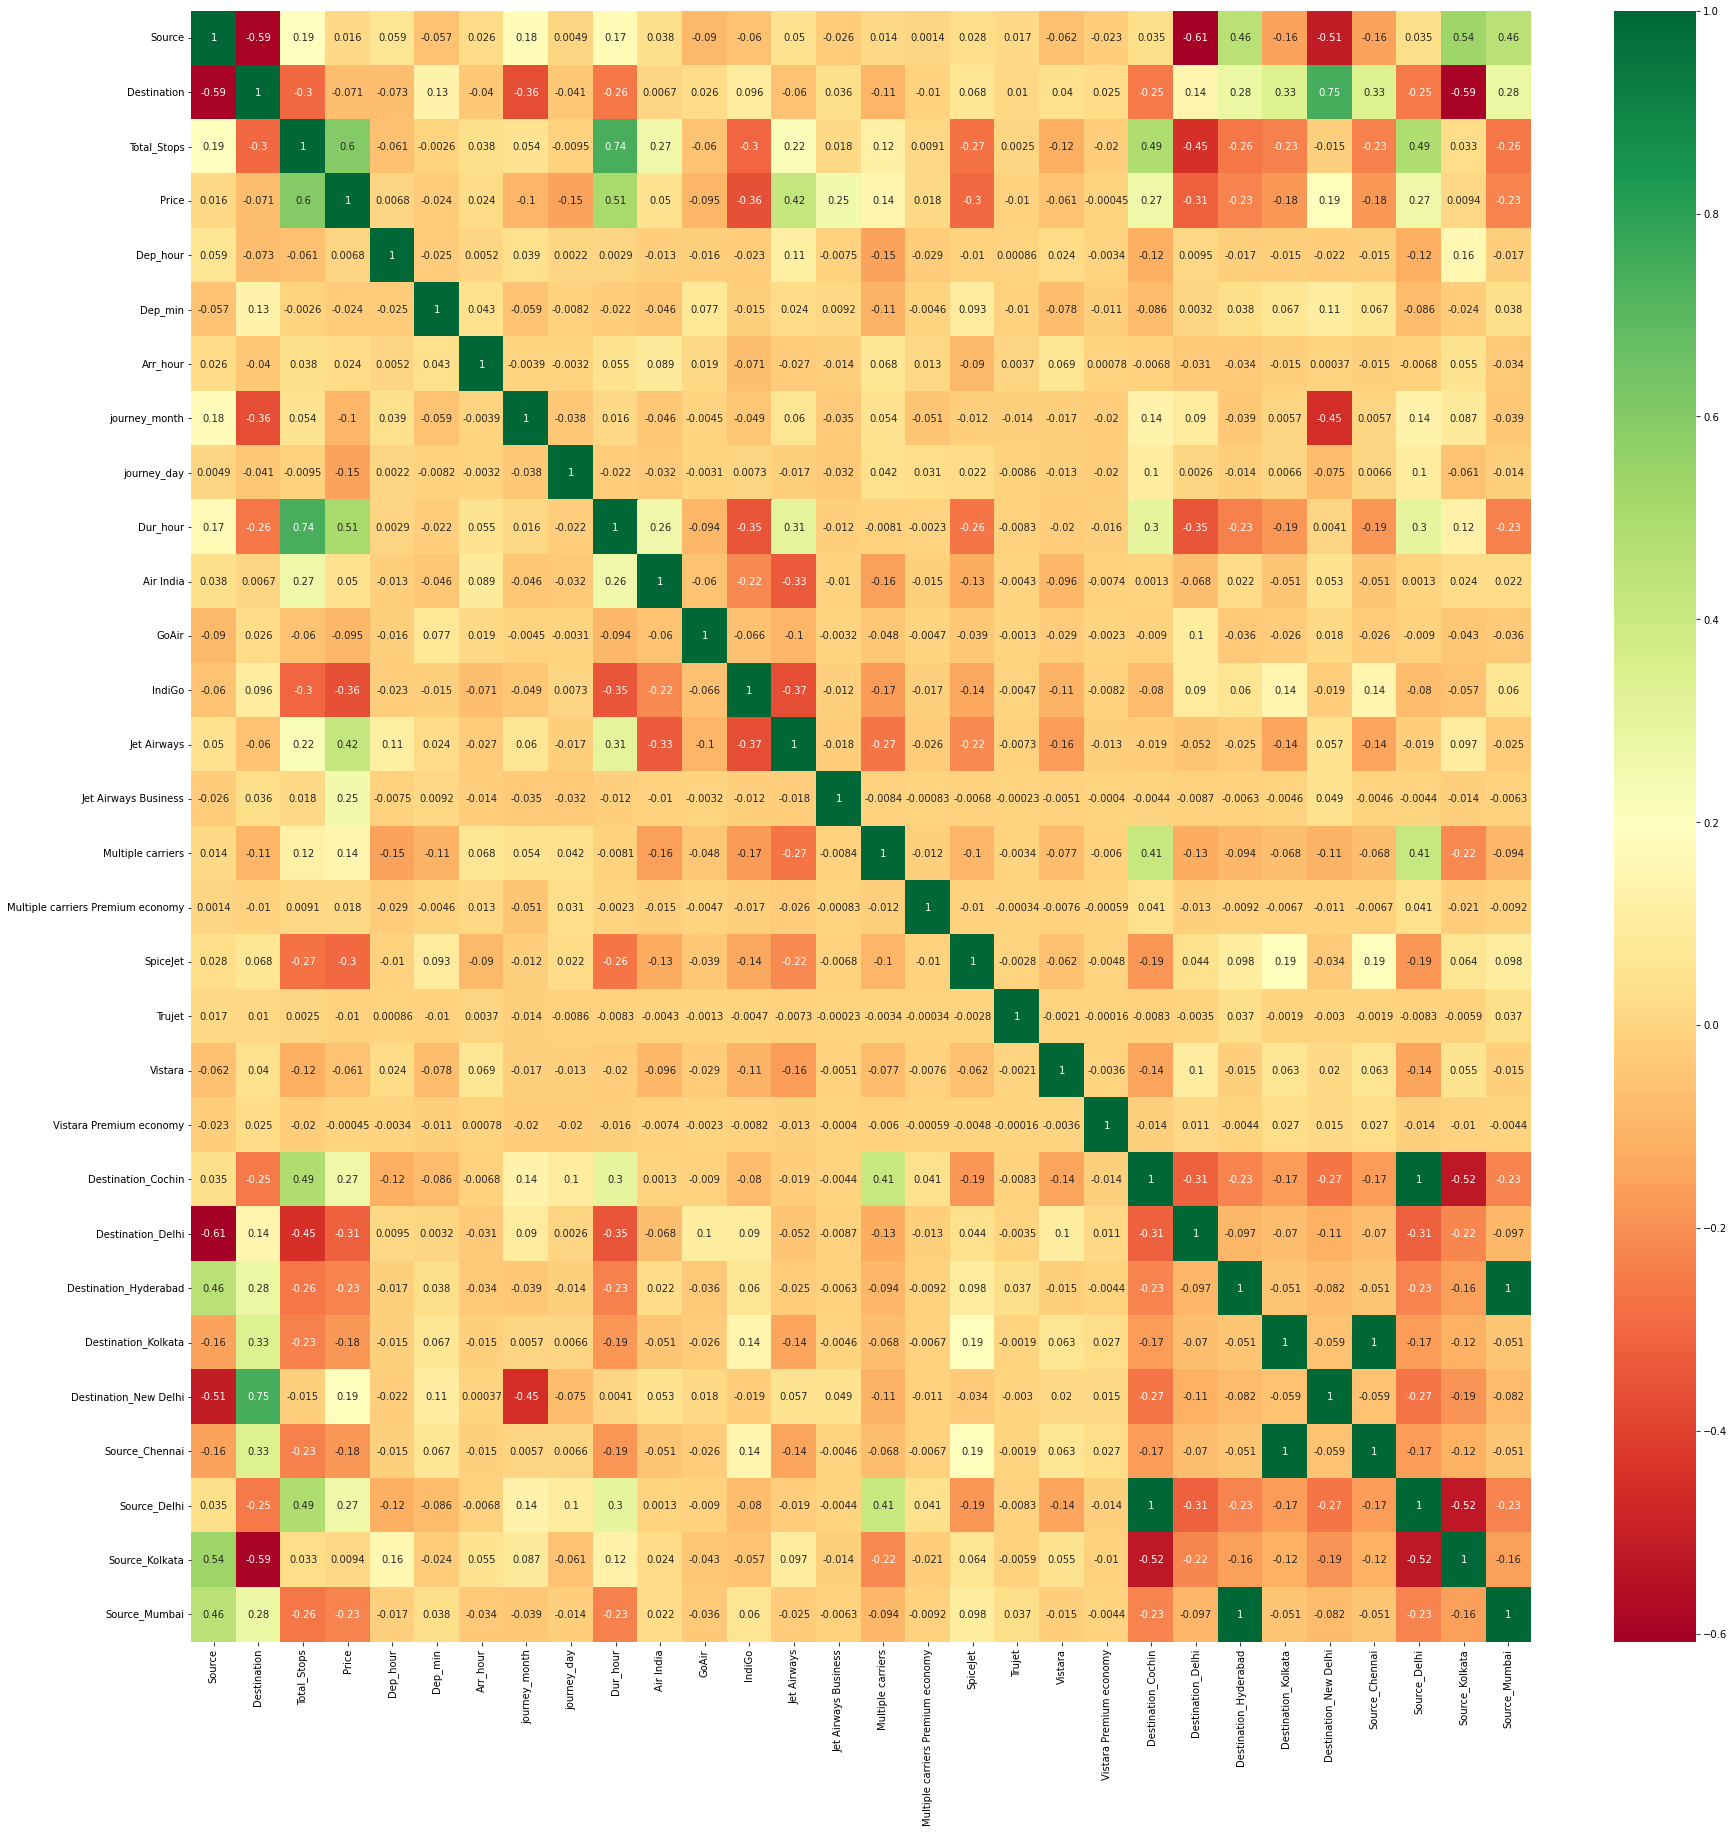

In [873]:
plt.figure(figsize= (30,30))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')

In [874]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [875]:
print(len(x_train),len(x_test))

8545 2137


In [876]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [877]:
model.score(x_train,y_train)

0.9675149367655012

In [878]:
model.score(x_test,y_test)

0.7410861599144443

In [879]:
y_pred=model.predict(x_test)

[2.31208790e-01 3.02441163e-02 3.01490796e-02 3.82519247e-02
 5.65609763e-02 1.44213642e-01 1.33821103e-01 1.08433905e-02
 1.88536212e-03 1.70820159e-02 1.32632590e-01 6.79428556e-02
 2.05974787e-02 8.64088347e-04 3.20354267e-03 1.17686282e-04
 5.26853992e-03 9.70100554e-05 8.21146494e-03 1.09355029e-02
 6.00868106e-03 6.09325362e-04 2.46558166e-02 5.08753656e-04
 1.38191381e-02 3.71502472e-03 6.55210023e-03]


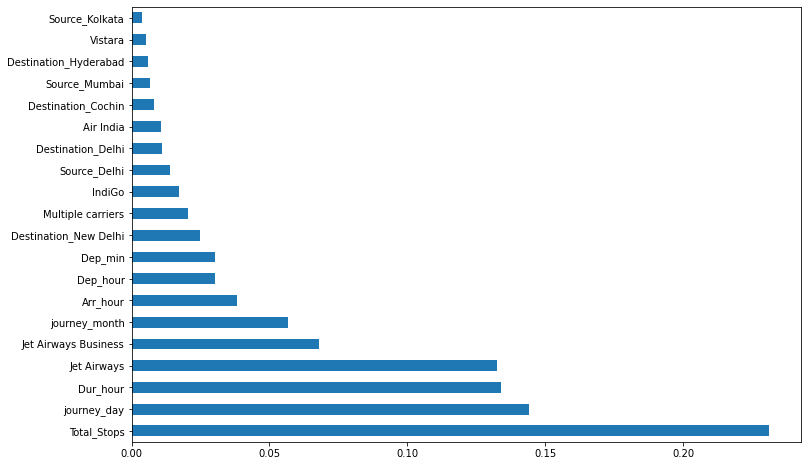

In [880]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)
print(selection.feature_importances_)
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


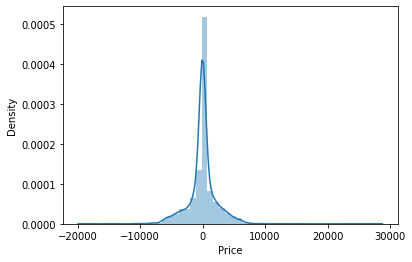

In [881]:
sns.distplot(y_test-y_pred)
plt.show()